In [1]:
import pandas as pd
import numpy as np

from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

from eda_utils import rle_to_indices

In [2]:
df = pd.read_csv('../data/train.csv')

num_classes_by_image = df.groupby(by='ImageId').size()
multiple_defect_classes = num_classes_by_image[num_classes_by_image > 1]
multiple_defect_classes_mask = df.ImageId.isin(multiple_defect_classes.index)
print(f'Removing {np.sum(multiple_defect_classes_mask)} images with multiple defect classes')
df = df[~multiple_defect_classes_mask]
df = df[df.ClassId.isin([1, 3])]

df = df.sample(frac=0.01, random_state=42)
print(df.shape)
df

Removing 856 images with multiple defect classes
(55, 3)


,ImageId,ClassId,EncodedPixels
4733,ac4ba5c1a.jpg,3,307566 2 307820 4 308074 5 308328 7 308582 9 3...
1743,409502827.jpg,3,16461 1 16716 2 16972 2 17227 3 17482 4 17738 ...
6251,e0593f542.jpg,3,184444 1 184698 3 184952 4 185206 6 185457 11 ...
4490,a3d5e7319.jpg,3,299978 1 300233 4 300489 5 300526 5 300744 8 3...
4304,9d34d1ed3.jpg,3,270806 43 270977 128 271148 7381 278657 128 28...
5171,baba8612a.jpg,3,292037 3 292291 5 292351 2 292545 8 292590 3 2...
6904,f9682bef7.jpg,3,268548 190 268805 189 269063 187 269320 187 26...
2095,4d9b0f8c6.jpg,3,312837 7 312879 2 312930 2 312953 2 312972 12 ...
3308,78a81eb21.jpg,3,180449 30 180641 94 180833 158 181025 222 1812...
2687,636700b91.jpg,3,80103 26 80308 77 80513 128 80718 179 80923 50...


In [3]:
%%time
df['indices'] = df.EncodedPixels.apply(rle_to_indices)
df

CPU times: user 507 ms, sys: 9.56 ms, total: 517 ms
Wall time: 516 ms


,ImageId,ClassId,EncodedPixels,indices
4733,ac4ba5c1a.jpg,3,307566 2 307820 4 308074 5 308328 7 308582 9 3...,"([1201, 1201, 1202, 1202, 1202, 1202, 1203, 12..."
1743,409502827.jpg,3,16461 1 16716 2 16972 2 17227 3 17482 4 17738 ...,"([64, 65, 65, 66, 66, 67, 67, 67, 68, 68, 68, ..."
6251,e0593f542.jpg,3,184444 1 184698 3 184952 4 185206 6 185457 11 ...,"([720, 721, 721, 721, 722, 722, 722, 722, 723,..."
4490,a3d5e7319.jpg,3,299978 1 300233 4 300489 5 300526 5 300744 8 3...,"([1171, 1172, 1172, 1172, 1172, 1173, 1173, 11..."
4304,9d34d1ed3.jpg,3,270806 43 270977 128 271148 7381 278657 128 28...,"([1057, 1057, 1057, 1057, 1057, 1057, 1057, 10..."
5171,baba8612a.jpg,3,292037 3 292291 5 292351 2 292545 8 292590 3 2...,"([1140, 1140, 1140, 1141, 1141, 1141, 1141, 11..."
6904,f9682bef7.jpg,3,268548 190 268805 189 269063 187 269320 187 26...,"([1049, 1049, 1049, 1049, 1049, 1049, 1049, 10..."
2095,4d9b0f8c6.jpg,3,312837 7 312879 2 312930 2 312953 2 312972 12 ...,"([1222, 1222, 1222, 1222, 1222, 1222, 1222, 12..."
3308,78a81eb21.jpg,3,180449 30 180641 94 180833 158 181025 222 1812...,"([704, 704, 704, 704, 704, 704, 704, 704, 704,..."
2687,636700b91.jpg,3,80103 26 80308 77 80513 128 80718 179 80923 50...,"([312, 312, 312, 312, 312, 312, 312, 312, 312,..."


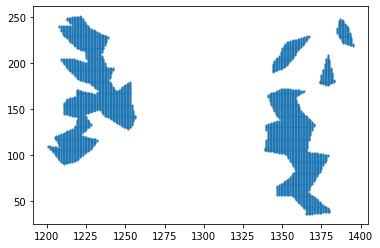

In [4]:
row = df.iloc[0, :]
plt.scatter(row.indices[0], row.indices[1], s=1)

CPU times: user 52.1 ms, sys: 2.06 ms, total: 54.1 ms
Wall time: 52.7 ms


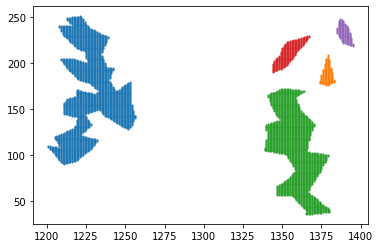

In [5]:
%%time


def get_adjacents(x, y):
    deltas = (
        ( 0,  1),
        ( 0, -1),
        ( 1,  0),
        (-1,  0),
    )
    return [(x + dx, y + dy) for (dx, dy) in deltas]


def identify_instances(indices):
    """
    Given a tuple of (x indices, y_indices) indicating defect masks,
    partitions the set of points into contiguous instances using a
    flood fill algorithm.
    
    Returns: A list of tuples of length N, where N is the number of instances.
    Each tuple contains the (x indices, y indices) pair for an instance.
    """
    result = []
    unidentified = set((x, y) for (x, y) in zip(*indices))
    while unidentified:
        instance = set()
        points_to_visit = {next(iter(unidentified))}
        while points_to_visit:
            for point in points_to_visit.copy():
                instance.add(point)
                unidentified.remove(point)
                for neighbor in get_adjacents(*point):
                    if neighbor in unidentified:
                        points_to_visit.add(neighbor)
            points_to_visit = points_to_visit.difference(instance)
        result.append(np.asarray(list(instance)))
    return result


row = df.iloc[0, :]
instances = identify_instances(row.indices)

for instance in instances:
    plt.scatter(instance[:, 0], instance[:, 1], s=1)

In [6]:
%%time
df['instances'] = df.indices.apply(identify_instances)

CPU times: user 5.19 s, sys: 29.3 ms, total: 5.22 s
Wall time: 5.22 s


In [7]:
%%time
output_data = []
num_instances = np.sum(df.instances.apply(lambda x: len(x)))
print(f'num_instances={num_instances}')
for row in tqdm(df.itertuples()):
    for instance in row.instances:
        output_data.append({
            'ImageId': row.ImageId,
            'ClassId': row.ClassId,
            'instance_center_x': np.mean(instance[:, 0]),
            'instance_min_x': np.mean(instance[:, 0]),
            'instance_min_x': np.min(instance[:, 0]),
            'instance_max_x': np.max(instance[:, 0]),
            'instance_std_x': np.std(instance[:, 0]),
        })
output_df = pd.DataFrame(output_data)
output_df

num_instances=153


0it [00:00, ?it/s]

CPU times: user 32.1 ms, sys: 15.5 ms, total: 47.6 ms
Wall time: 46 ms


,ImageId,ClassId,instance_center_x,instance_min_x,instance_max_x,instance_std_x
0,ac4ba5c1a.jpg,3,1227.626435,1201,1256,12.087398
1,ac4ba5c1a.jpg,3,1378.553672,1374,1383,2.052613
2,ac4ba5c1a.jpg,3,1358.213191,1339,1380,8.872769
3,ac4ba5c1a.jpg,3,1353.812325,1344,1367,5.448107
4,ac4ba5c1a.jpg,3,1389.486034,1385,1395,2.495488
...,...,...,...,...,...,...
148,4ef21d9b7.jpg,3,598.410367,590,608,4.172322
149,97bf2a97c.jpg,1,70.753304,61,80,5.235294
150,97bf2a97c.jpg,1,933.511327,924,943,5.322666
151,97bf2a97c.jpg,1,1202.360695,1189,1214,6.219900


In [8]:
output_df.describe()

,ClassId,instance_center_x,instance_min_x,instance_max_x,instance_std_x
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,2.751634,916.932429,876.601307,956.764706,20.805397
std,0.661747,396.038801,406.991648,405.365426,45.234268
min,1.000000,20.919536,0.000000,47.000000,0.000000
25%,3.000000,625.780591,596.000000,647.000000,5.033273
50%,3.000000,1034.034079,995.000000,1095.000000,6.987468
75%,3.000000,1229.518519,1212.000000,1262.000000,12.513913
max,3.000000,1503.028318,1468.000000,1576.000000,312.843510


<AxesSubplot:>

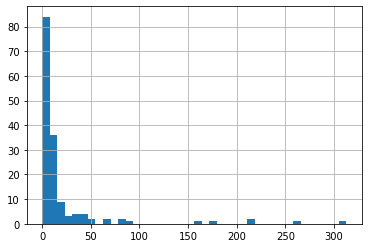

In [9]:
output_df.instance_std_x.hist(bins=40)

In [10]:
output_df.to_csv('defect_instances.csv')